## 说明

请按照填空顺序编号分别完成 参数优化，不同基函数的实现

线性回归的基本特征：模型是参数的线性函数

### 一般线性回归

对于一个一般的模型而言，它既是参数的线性组合，同时也是输入变量的线性组合。从数学上来说，如果定义$y$为模型的期望输出，那么有：

$y(w, x) = w_0 + w_1 \times x_1 + w_2 \times x_2 + ... + w_n \times x_n$

其中$w = \left \{w_0, w_1, w_2, ..., w_n \right \}$为参数向量，$x = \left \{x_0, x_1, x_2, ..., x_n \right \}$为输入向量

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def load_data(filename):
    """载入数据。"""
    xys = []
    with open(filename, 'r') as f:
        for line in f:
            xys.append(map(float, line.strip().split()))
        xs, ys = zip(*xys)
        return np.asarray(xs), np.asarray(ys)

In [2]:
x_data, y_data = load_data('train.txt')

In [3]:
x_data.shape

(300,)

## 不同的基函数 (basis function)的实现 填空顺序 2

请分别在这里实现“多项式基函数”以及“高斯基函数”

其中以及训练集的x的范围在0-25之间

## 基于基函数的线性回归模型

线性回归模型的基本特征就是，模型是参数向量$w = \left \{ w_0, w_1, w_2, ...,w_n \right \}$的线性函数，一般的线性回归模型同时也是输入变量$x$的线性函数，这就极大的限制了模型的适用性，因此使用基函数(basic function)对一般的线性回归模型就行扩展如下：

$y(x, w) = w_0 + \sum_{j=1}^{M} w_j \phi_j(x)$，当$\phi_j(x) = x_j$时，那么很容易得到$y(w, x) = w_0 + w_1 \times x_1 + w_2 \times x_2 + ... + w_n \times x_n$

当$\phi_j(x) = x^j$时，$\phi_j(x)可以称做多项式基函数$，此时$y(x, w) = w_0 + \sum_{j=1}^{M} w_j x^j = \sum_{j=0}^{M} w_j x^j$

其中$w = (w_0, w_1, ..., w_M)^T, \phi(x) = (1, \phi_1(x), \phi_2(x),..., \phi_M(x))^T$，可见，当基函数确定后，目标函数$y(x, w)$是代求参数$w$的线性函数，这也是线性回归模型“线性”二字的由来

高斯基函数：$\phi_j(x) = ae^{-\frac{(x - u_j)^2}{2s^2}}$

In [4]:
def identity_basis(x):
    ret = np.expand_dims(x, axis=1)
    return ret

def multinomial_basis(x, feature_num=10):
    '''多项式基函数'''
    x = np.expand_dims(x, axis=1) # shape(N, 1)
    #==========
    #todo '''请实现多项式基函数'''
    #==========
    polynomial_function = [x]
    
    tmp = x
    
    for i in range(2, feature_num+1):
        tmp = tmp*x
        polynomial_function.append(tmp)
    
    ret = np.concatenate(polynomial_function, axis=1) # shape(N, feature_num)
    return ret

def gaussian_basis(x, feature_num=10):
    '''高斯基函数'''
    #==========
    #todo '''请实现高斯基函数'''
    #==========
    
    x = np.expand_dims(x, axis=1) # shape(N, 1)
    
    f = [x] * feature_num
    
    f = np.concatenate(f, axis=1) # shape(N, feature_num)
    
    means = np.linspace(0, 25, feature_num) # 因为训练数据和测试数据的范围大致为[0, 25]，所以设置区间为[0, 25], shape(feature_num)
    
    tmp = f - means # shape(N, feature_num), broadcasting of numpy
    
    ret = np.exp(-1.0/2*(np.power(tmp, 2)))
    return ret

## 返回一个训练好的模型 填空顺序 1 用最小二乘法进行模型优化 
## 填空顺序 3 用梯度下降进行模型优化
> 先完成最小二乘法的优化 (参考书中第二章 2.3中的公式)

公式：给定一组包含$N$个训练样本的训练集，$Data = \left \{ (x^{(n)},y^{(n)}) \right \}_{n=1}^{D}$，我们希望能过学习一个最优的线性回归的模型参数$w$。

根据风险最小化原则，训练集上的风险定义为：$\Re(w) = \frac{1}{2} \sum_{n=1}^{N}(y^{n}-\textbf{w}^{T} \textbf{x}^{n})^2 = \frac{1}{2}\left \| \textbf{y}- \textbf{x}^{T} \textbf{w} \right \|$

其中$ \textbf{y}=[y^{(1)},...,y^{(N)}]^T \in \mathbb{R}^N$是由所有样本的真实标签组成的列向量，而$\textbf{X} \in \mathbb{R}^{(D+1) \times N}$是所有样本的输入特征$x^{(1)},...,x^{(n)}$组成的矩阵

令$\frac{ \partial }{ \partial \textbf{w}}\Re (\textbf{w})=0$，得到的最优解参数$\textbf{w}^{*}$为：$\textbf{w}^{*} = (\textbf{X} \textbf{X}^T)^{-1} \textbf{X} \textbf{y}$

> 再完成梯度下降的优化   (参考书中第二章 2.3中的公式)

在main中利用训练集训练好模型的参数，并且返回一个训练好的模型。

计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w

## 使用最小二乘法进行模型优化(identity_basis)

基函数使用的是一次线性函数identity_basis，即$y(w, x) = w_0 + w_1 \times x_1 + w_2 \times x_2 + ... + w_n \times x_n$

In [5]:
def main_least_square(x_train, y_train):
    """
    训练模型，并返回从x到y的映射。
    
    """
    basis_func = identity_basis
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1) # shape(N, 1)
    phi1 = basis_func(x_train) # shape(N, 1)
    phi = np.concatenate([phi0, phi1], axis=1) #shape(N, 2)
    
    
    #==========
    #todo '''计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w'''
    #==========
    
    # 书中的每一个样本为一个列向量，而这里的每一个样本为一个行向量，故这里的X相当于X^T
    
    w = np.dot(np.linalg.inv(np.dot(phi.T, phi)), np.dot(phi.T, y_train))
    print(w)
    
    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1) # shape(N, 1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w)
        return y

    return f

## 评估结果 
> 没有需要填写的代码，但是建议读懂

(300,)
(200,)
[0.62680273 0.94732599]
训练集预测值与真实值的标准差：2.0
测试集预测值与真实值的标准差：2.2


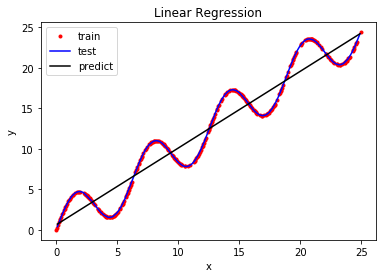

In [6]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)

    # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
    f = main_least_square(x_train, y_train)

    y_train_predict = f(x_train)
    std = evaluate(y_train, y_train_predict)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))
    
    # 计算预测的输出值
    y_train_predict = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_train_predict)
    print('测试集预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
    plt.plot(x_test, y_test, 'b')
    plt.plot(x_test, y_train_predict, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'predict'])
    plt.show()

## 使用最小二乘法进行模型优化(multinomial_basis)

基函数使用的是多项式基函数multinomial_basis，即$y(x, w) = w_0 + \sum_{j=1}^{M} w_j \phi_j(x)$

In [7]:
def main_least_square(x_train, y_train, feature_num):
    """
    训练模型，并返回从x到y的映射。
    
    """
    basis_func = multinomial_basis
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1) # shape(N, 1)
    phi1 = basis_func(x_train, feature_num) # shape(N, feature_num)
    
    
    phi = np.concatenate([phi0, phi1], axis=1) #shape(N, feature_num + 1)
    
    #==========
    #todo '''计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w'''
    #==========
    
    # 书中的每一个样本为一个列向量，而这里的每一个样本为一个行向量，故这里的X相当于X^T
    
    w = np.dot(np.linalg.inv(np.dot(phi.T, phi)), np.dot(phi.T, y_train))
    
    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1) # shape(N, 1)
        phi1 = basis_func(x, feature_num)
        phi = np.concatenate([phi0, phi1], axis=1)
        
        y = np.dot(phi, w)
        return y

    return f

## 评估结果 
> 没有需要填写的代码，但是建议读懂

实验结果表明，当$y(x, w) = w_0 + \sum_{j=1}^{11} w_j x^j(x)$时，拟合效果较好

(300,)
(200,)
基函数的最高次数为: 1
训练集预测值与真实值的标准差：2.0
测试集预测值与真实值的标准差：2.2


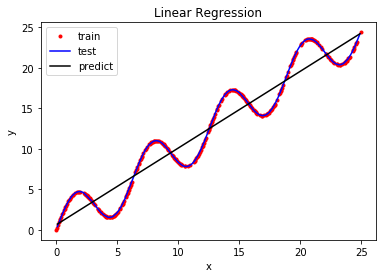

基函数的最高次数为: 2
训练集预测值与真实值的标准差：2.0
测试集预测值与真实值的标准差：2.2


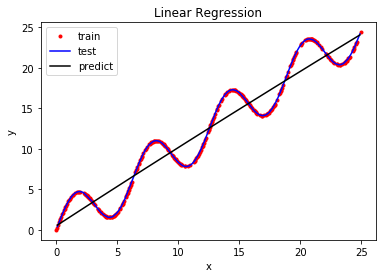

基函数的最高次数为: 3
训练集预测值与真实值的标准差：2.0
测试集预测值与真实值的标准差：2.1


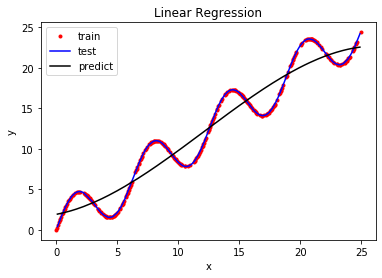

基函数的最高次数为: 4
训练集预测值与真实值的标准差：2.0
测试集预测值与真实值的标准差：2.1


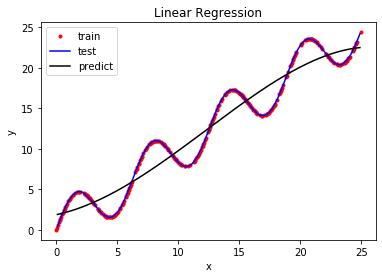

基函数的最高次数为: 5
训练集预测值与真实值的标准差：1.9
测试集预测值与真实值的标准差：2.1


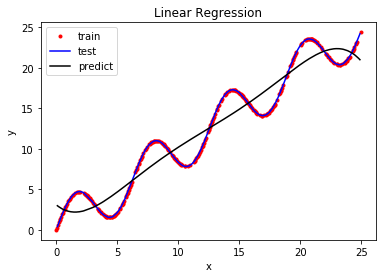

基函数的最高次数为: 6
训练集预测值与真实值的标准差：1.9
测试集预测值与真实值的标准差：2.1


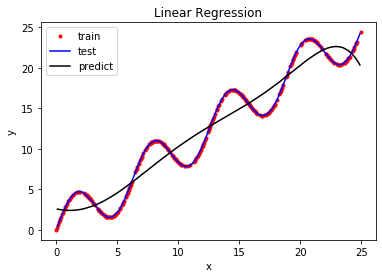

基函数的最高次数为: 7
训练集预测值与真实值的标准差：1.8
测试集预测值与真实值的标准差：2.0


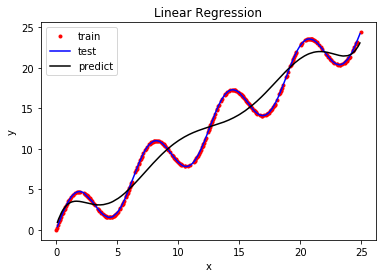

基函数的最高次数为: 8
训练集预测值与真实值的标准差：1.8
测试集预测值与真实值的标准差：2.0


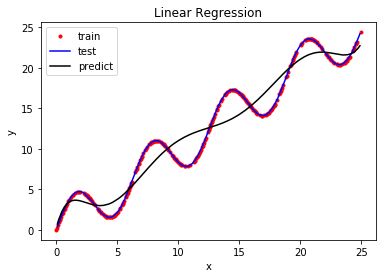

基函数的最高次数为: 9
训练集预测值与真实值的标准差：1.5
测试集预测值与真实值的标准差：1.6


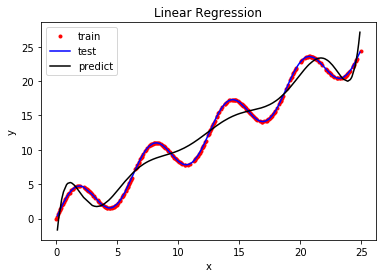

基函数的最高次数为: 10
训练集预测值与真实值的标准差：1.5
测试集预测值与真实值的标准差：1.6


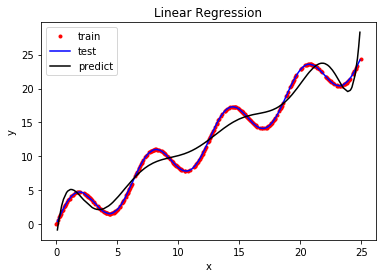

基函数的最高次数为: 11
训练集预测值与真实值的标准差：0.8
测试集预测值与真实值的标准差：0.9


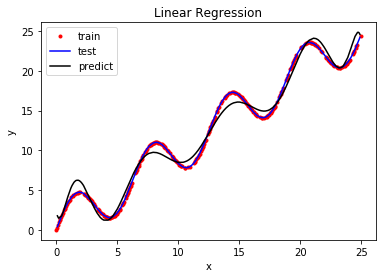

基函数的最高次数为: 12
训练集预测值与真实值的标准差：14.4
测试集预测值与真实值的标准差：13.3


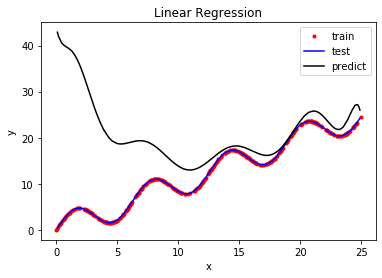

基函数的最高次数为: 13
训练集预测值与真实值的标准差：10.8
测试集预测值与真实值的标准差：10.4


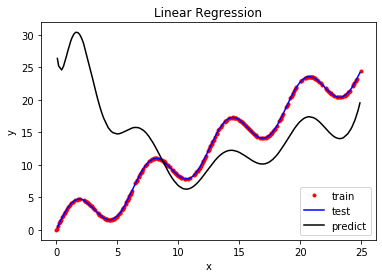

基函数的最高次数为: 14
训练集预测值与真实值的标准差：27.2
测试集预测值与真实值的标准差：25.0


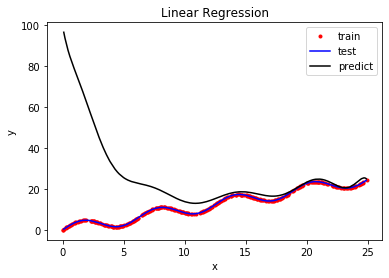

基函数的最高次数为: 15
训练集预测值与真实值的标准差：144.5
测试集预测值与真实值的标准差：132.4


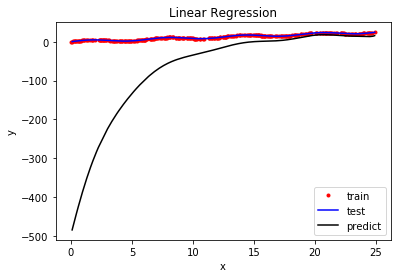

基函数的最高次数为: 16
训练集预测值与真实值的标准差：72.4
测试集预测值与真实值的标准差：67.3


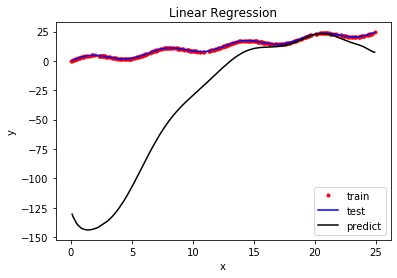

基函数的最高次数为: 17
训练集预测值与真实值的标准差：342.3
测试集预测值与真实值的标准差：311.7


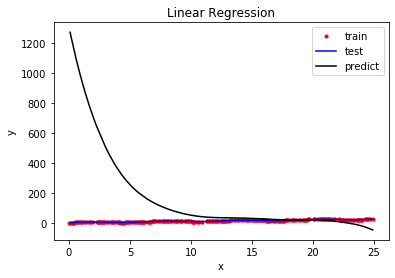

基函数的最高次数为: 18
训练集预测值与真实值的标准差：149.6
测试集预测值与真实值的标准差：137.5


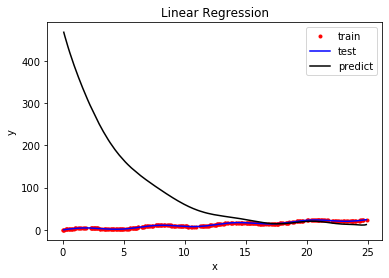

基函数的最高次数为: 19
训练集预测值与真实值的标准差：236.6
测试集预测值与真实值的标准差：220.1


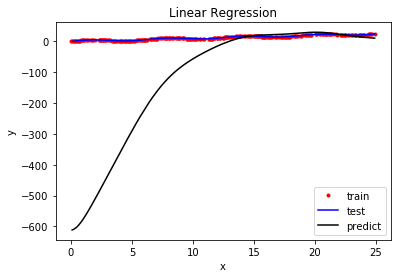

In [8]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)
    
    for i in range(1, 20):
        # 使用线性回归训练模型，返回一个函数f()使得y = f(x)
        
        print('基函数的最高次数为:', i)
        f = main_least_square(x_train, y_train, i)

        y_train_predict = f(x_train)
        std = evaluate(y_train, y_train_predict)
        print('训练集预测值与真实值的标准差：{:.1f}'.format(std))

        # 计算预测的输出值
        y_train_predict = f(x_test)
        # 使用测试集评估模型
        std = evaluate(y_test, y_train_predict)
        print('测试集预测值与真实值的标准差：{:.1f}'.format(std))

        #显示结果
        plt.plot(x_train, y_train, 'ro', markersize=3)
        plt.plot(x_test, y_test, 'b')
        plt.plot(x_test, y_train_predict, 'k')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('Linear Regression')
        plt.legend(['train', 'test', 'predict'])
        plt.show()

## 使用最小二乘法进行模型优化(gaussian_basis)

基函数使用的是多项式基函数gaussian_basis

In [9]:
def main_least_square(x_train, y_train):
    """
    训练模型，并返回从x到y的映射。
    
    """
    basis_func = gaussian_basis
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1) # shape(N, 1)
    phi1 = basis_func(x_train) # shape(N, feature_num)
    
    
    phi = np.concatenate([phi0, phi1], axis=1) #shape(N, feature_num + 1)
    
    #==========
    #todo '''计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w'''
    #==========
    
    # 书中的每一个样本为一个列向量，而这里的每一个样本为一个行向量，故这里的X相当于X^T
    
    w = np.dot(np.linalg.inv(np.dot(phi.T, phi)), np.dot(phi.T, y_train))
    
    print('w shape', w.shape)
    print('phi shape', phi.shape)
    
    
    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1) # shape(N, 1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi0, phi1], axis=1)
        
        y = np.dot(phi, w)
        
        return y

    return f

## 评估结果

(300,)
(200,)
w shape (11,)
phi shape (300, 11)
训练集预测值与真实值的标准差：1.3
测试集预测值与真实值的标准差：1.2


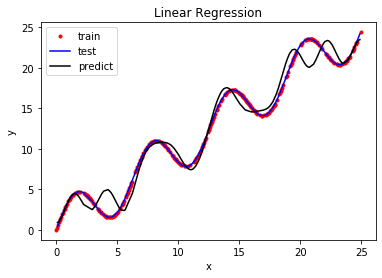

In [10]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)
    
    f = main_least_square(x_train, y_train)

    y_train_predict = f(x_train)
    std = evaluate(y_train, y_train_predict)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))

    # 计算预测的输出值
    y_train_predict = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_train_predict)
    print('测试集预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
    plt.plot(x_test, y_test, 'b')
    plt.plot(x_test, y_train_predict, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'predict'])
    plt.show()

## 使用梯度下降法进行优化(identity_basis)

基函数使用的是一次线性函数identity_basis，即$y(w, x) = w_0 + w_1 \times x_1 + w_2 \times x_2 + ... + w_n \times x_n$。

定义$Loss(w, x) = 0.5 \times (y_{predict} - y_{target})^2$

如果设第$i$个样本的$j$个参数为$x_{ij}$，则，$\frac{\partial Loss(w, x)}{\partial w_{ij}} = (y_{predict}^i - y_{target}^i) x_{ij}$

In [11]:
def main_gradient_descent(x_train, y_train):
    """
    训练模型，并返回从x到y的映射。
    
    """
    basis_func = identity_basis
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1) # shape(N)
    phi1 = basis_func(x_train) # shape(N, 1)
    phi = np.concatenate([phi0, phi1], axis=1) # shape(N, 2)
    
    
    #==========
    #todo '''计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w'''
    #==========
    
    w = np.random.randn(phi.shape[1], 1) # shape(phi.shape[1], 1)
    
    learning_rate = 0.01
    
    cnt = 10000
    
    # 这里分别把y_train和x_train转换为二维的矩阵，虽然numpy有broadcast机制，但是这样可读性更强
    
    y_train_tmp = np.expand_dims(y_train, axis=1)
    x_train_tmp = np.expand_dims(x_train, axis=1)
    
    for i in range(cnt):
        
        y_predict = np.dot(phi, w) # shape(N, 1)
        error = y_train_tmp - y_predict # shape(N, 1)
        deta_w = error * phi # shape(N, phi.shape[1])
        deta_w = np.mean(deta_w, axis=0) # shape(phi.shape[1])
        deta_w = np.expand_dims(deta_w, axis=1) # shape(phi.shape[1], 1)
        w += learning_rate*deta_w
    
    print(w)
    
    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w) # shape(N, 1)
        y = y.flatten() # 转变为一维向量，如果不变成一维向量在evaluate的时候由于numpy的broadcast机制会导致计算出的标准差边大
        return y
        pass

    return f

(300,)
(200,)
[[0.62680273]
 [0.94732599]]
训练集预测值与真实值的标准差：2.0
测试集预测值与真实值的标准差：2.2


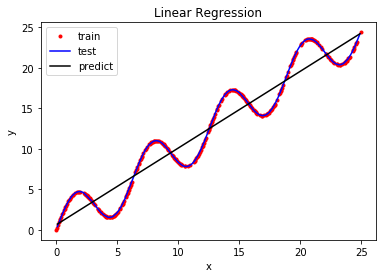

In [12]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)
    
    f = main_gradient_descent(x_train, y_train)

    y_train_predict = f(x_train)
    std = evaluate(y_train, y_train_predict)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))

    # 计算预测的输出值
    y_train_predict = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_train_predict)
    print('测试集预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
    plt.plot(x_test, y_test, 'b')
    plt.plot(x_test, y_train_predict, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'predict'])
    plt.show()

## 使用梯度下降法进行优化(multinomial_basis)

基函数使用的是多项式基函数multinomial_basis，即$y(w, x) = w_0 + w_1 \times x_1 + w_2 \times x_2^2 + ... + w_n \times x_n^n$。

定义$Loss(w, x) = 0.5 \times (y_{predict} - y_{target})^2$

如果设第$i$个样本的$j$个参数为$x_{ij}$，则，$\frac{\partial Loss(w, x)}{\partial w_{ij}} = (y_{predict}^i - y_{target}^i) x_{ij}^j$

实验发现如果feature_num过大，则预测值会出现抖动的情况，导致到不到使得Loss最小的极值点，即使当feature_num为3时，学习率已经调整到$10^{-9}$的级别还是不能收敛，因此这里设置feature_num为2

In [109]:
def main_gradient_descent(x_train, y_train):
    """
    训练模型，并返回从x到y的映射。
    
    """
    basis_func = multinomial_basis
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1) # shape(N)
    phi1 = basis_func(x_train, 2) # shape(N, feature_num)
    phi = np.concatenate([phi0, phi1], axis=1) # shape(N, feature_num + 1)
    
    
    #==========
    #todo '''计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w'''
    #==========
    
    w = np.random.randn(phi.shape[1], 1) # shape(phi.shape[1], 1)
        
    learning_rate = 0.00001
    
    cnt = 10000
    
    # 这里分别把y_train和x_train转换为二维的矩阵，虽然numpy有broadcast机制，但是这样可读性更强
    
    y_train_tmp = np.expand_dims(y_train, axis=1)
    x_train_tmp = np.expand_dims(x_train, axis=1)
    
    for i in range(cnt):
        
        y_predict = np.dot(phi, w) # shape(N, 1)
        
        # print('y_predict', y_predict[:, :][:5])
        
        error = y_train_tmp - y_predict # shape(N, 1)
        
        # print('error:', error)
        
        deta_w = error * phi # shape(N, phi.shape[1])
        deta_w = np.mean(deta_w, axis=0) # shape(phi.shape[1])
        deta_w = np.expand_dims(deta_w, axis=1) # shape(phi.shape[1], 1)
        w += learning_rate*deta_w
        
        # print('w', w)
    
    print(w)
    
    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x, 2)
        phi = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w) # shape(N, 1)
        y = y.flatten() # 转变为一维向量，如果不变成一维向量在evaluate的时候由于numpy的broadcast机制会导致计算出的标准差边大
        return y
        pass

    return f

(300,)
(200,)
[[0.59074023]
 [0.32189845]
 [0.03168902]]
训练集预测值与真实值的标准差：3.1
测试集预测值与真实值的标准差：3.2


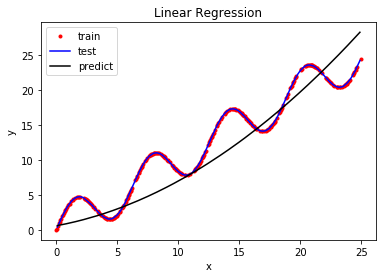

In [110]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)
    
    f = main_gradient_descent(x_train, y_train)

    y_train_predict = f(x_train)
    std = evaluate(y_train, y_train_predict)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))

    # 计算预测的输出值
    y_train_predict = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_train_predict)
    print('测试集预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
    plt.plot(x_test, y_test, 'b')
    plt.plot(x_test, y_train_predict, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'predict'])
    plt.show()

## 使用梯度下降法进行优化(gaussian_basis)

基函数使用的是多项式基函数gaussian_basis，即$y(w, x) = w_0 + w_1 \times ae^{-\frac{(x - u_1)^2}{2s^2}} + w_2 \times ae^{-\frac{(x - u_2)^2}{2s^2}} + ... + w_n \times ae^{-\frac{(x - u_n)^2}{2s^2}}$。

定义$Loss(w, x) = 0.5 \times (y_{predict} - y_{target})^2$

如果设第$i$个样本的$j$个参数为$x_{ij}$，则，$\frac{\partial Loss(w, x)}{\partial w_{ij}} = (y_{predict}^i - y_{target}^i) ae^{-\frac{(x_{ij} - u_j)^2}{2s^2}}$

In [122]:
def main_gradient_descent(x_train, y_train):
    """
    训练模型，并返回从x到y的映射。
    
    """
    basis_func = gaussian_basis
    phi0 = np.expand_dims(np.ones_like(x_train), axis=1) # shape(N)
    phi1 = basis_func(x_train) # shape(N, feature_num)
    phi = np.concatenate([phi0, phi1], axis=1) # shape(N, feature_num + 1)
    
    
    #==========
    #todo '''计算出一个优化后的w，请分别使用最小二乘法以及梯度下降两种办法优化w'''
    #==========
    
    w = np.random.randn(phi.shape[1], 1) # shape(phi.shape[1], 1)
        
    learning_rate = 0.02
    
    cnt = 10000
    
    # 这里分别把y_train和x_train转换为二维的矩阵，虽然numpy有broadcast机制，但是这样可读性更强
    
    y_train_tmp = np.expand_dims(y_train, axis=1)
    x_train_tmp = np.expand_dims(x_train, axis=1)
    
    for i in range(cnt):
        
        y_predict = np.dot(phi, w) # shape(N, 1)
        
        # print('y_predict', y_predict[:, :][:5])
        
        error = y_train_tmp - y_predict # shape(N, 1)
        
        # print('error:', error)
        
        deta_w = error * phi # shape(N, phi.shape[1])
        deta_w = np.mean(deta_w, axis=0) # shape(phi.shape[1])
        deta_w = np.expand_dims(deta_w, axis=1) # shape(phi.shape[1], 1)
        w += learning_rate*deta_w
        
        # print('w', w)
    
    print(w)
    
    def f(x):
        phi0 = np.expand_dims(np.ones_like(x), axis=1)
        phi1 = basis_func(x)
        phi = np.concatenate([phi0, phi1], axis=1)
        y = np.dot(phi, w) # shape(N, 1)
        y = y.flatten() # 转变为一维向量，如果不变成一维向量在evaluate的时候由于numpy的broadcast机制会导致计算出的标准差边大
        return y
        pass

    return f

(300,)
(200,)
[[ 11.81223253]
 [-10.63540899]
 [ -8.93165061]
 [ -9.15334128]
 [ -0.66336204]
 [ -4.36790786]
 [  5.86502585]
 [  2.64154644]
 [ 10.27651563]
 [ 11.21829724]
 [ 11.48522376]]
训练集预测值与真实值的标准差：1.3
测试集预测值与真实值的标准差：1.2


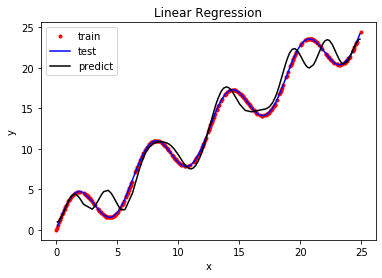

In [123]:
def evaluate(ys, ys_pred):
    """评估模型。"""
    std = np.sqrt(np.mean(np.abs(ys - ys_pred) ** 2))
    return std

# 程序主入口（建议不要改动以下函数的接口）
if __name__ == '__main__':
    train_file = 'train.txt'
    test_file = 'test.txt'
    # 载入数据
    x_train, y_train = load_data(train_file)
    x_test, y_test = load_data(test_file)
    print(x_train.shape)
    print(x_test.shape)
    
    f = main_gradient_descent(x_train, y_train)

    y_train_predict = f(x_train)
    std = evaluate(y_train, y_train_predict)
    print('训练集预测值与真实值的标准差：{:.1f}'.format(std))

    # 计算预测的输出值
    y_train_predict = f(x_test)
    # 使用测试集评估模型
    std = evaluate(y_test, y_train_predict)
    print('测试集预测值与真实值的标准差：{:.1f}'.format(std))

    #显示结果
    plt.plot(x_train, y_train, 'ro', markersize=3)
    plt.plot(x_test, y_test, 'b')
    plt.plot(x_test, y_train_predict, 'k')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Linear Regression')
    plt.legend(['train', 'test', 'predict'])
    plt.show()

经过实验，发现梯度下降法收敛之后的权重向量$\vec{w}$约等于最小二乘法求出的权重向量，预测结果也相似